In [29]:
import netCDF4
import numpy as np
import xarray as xr
from matplotlib import pyplot as plt
%matplotlib inline

In [30]:
from argopy import DataFetcher as ArgoDataFetcher
plt.style.use('default')
argo_loader = ArgoDataFetcher()
argo_loader = ArgoDataFetcher(backend='erddap')
argo_loader = ArgoDataFetcher(cachedir='tmp')

In [32]:
apDS2 = argo_loader.profile(6900944,10).to_xarray()
data  = apDS2.argo.point2profile()
data

<xarray.Dataset>
Dimensions:          (N_LEVELS: 77, N_PROF: 1)
Coordinates:
  * N_PROF           (N_PROF) int64 0
  * N_LEVELS         (N_LEVELS) int64 0 1 2 3 4 5 6 7 ... 70 71 72 73 74 75 76
    LONGITUDE        (N_PROF) float64 169.0
    TIME             (N_PROF) datetime64[ns] 2012-01-28T23:37:00
    LATITUDE         (N_PROF) float64 -22.23
Data variables:
    CYCLE_NUMBER     (N_PROF) int64 10
    DATA_MODE        (N_PROF) <U1 'D'
    DIRECTION        (N_PROF) <U1 'A'
    PLATFORM_NUMBER  (N_PROF) int64 6900944
    POSITION_QC      (N_PROF) int64 1
    PRES             (N_PROF, N_LEVELS) float64 16.0 26.0 ... 1.639e+03
    PRES_QC          (N_PROF) int64 1
    PSAL             (N_PROF, N_LEVELS) float64 35.11 35.11 ... 34.59 34.59
    PSAL_QC          (N_PROF) int64 1
    TEMP             (N_PROF, N_LEVELS) float64 27.11 27.11 ... 2.719 2.704
    TEMP_QC          (N_PROF) int64 1
    TIME_QC          (N_PROF) int64 1
Attributes:
    cdm_altitude_proxy:        pres
    cdm_data_type:             TrajectoryProfile
    cdm_profile_variables:     cycle_number, data_type, format_version, handb...
    cdm_trajectory_variables:  platform_number, project_name, pi_name, platfo...
    Conventions:               Argo-3.1, CF-1.6, COARDS, ACDD-1.3
    creator_email:             support@argo.net
    creator_name:              Argo
    creator_url:               http://www.argo.net/
    Easternmost_Easting:       168.963
    featureType:               TrajectoryProfile
    geospatial_lat_max:        -22.226
    geospatial_lat_min:        -22.226
    geospatial_lat_units:      degrees_north
    geospatial_lon_max:        168.963
    geospatial_lon_min:        168.963
    geospatial_lon_units:      degrees_east
    history:                   2020-07-13T10:24:52Z (local files)\n2020-07-13...
    id:                        ArgoFloats
    infoUrl:                   http://www.argo.net/
    institution:               Argo
    keywords:                  adjusted, argo, array, assembly, best, centre,...
    keywords_vocabulary:       GCMD Science Keywords
    license:                   The data may be used and redistributed for fre...
    Northernmost_Northing:     -22.226
    references:                http://www.argodatamgt.org/Documentation
    source:                    Argo float
    sourceUrl:                 (local files)
    Southernmost_Northing:     -22.226
    standard_name_vocabulary:  CF Standard Name Table v29
    summary:                   Argo float vertical profiles from Coriolis Glo...
    time_coverage_end:         2012-01-28T23:37:00Z
    time_coverage_start:       2012-01-28T23:37:00Z
    title:                     Argo Float Measurements
    user_manual_version:       3.1
    Westernmost_Easting:       168.963
    DATA_ID:                   ARGO
    DOI:                       http://doi.org/10.17882/42182
    Fetched_from:              http://www.ifremer.fr/erddap
    Fetched_by:                pvb
    Fetched_date:              2020/07/13
    Fetched_constraints:       phy_WMO6900944_CYC0010
    Fetched_uri:               http://www.ifremer.fr/erddap/tabledap/ArgoFloa...

In [33]:
cy0D  = xr.open_dataset('/Volumes/OkapiBU/Data/Argo/dac/coriolis/6900944/profiles/D6900944_000D.nc')
cy0  = xr.open_dataset('/Volumes/OkapiBU/Data/Argo/dac/coriolis/6900944/profiles/D6900944_000.nc')
cy1  = xr.open_dataset('/Volumes/OkapiBU/Data/Argo/dac/coriolis/6900944/profiles/D6900944_001.nc')
cy2  = xr.open_dataset('/Volumes/OkapiBU/Data/Argo/dac/coriolis/6900944/profiles/D6900944_002.nc')

In [1]:
print(cy0.DATA_MODE.values.astype(str)[0])

NameError: name 'cy0' is not defined

<xarray.DataArray 'JULD' (N_PROF: 1)>
array(['2011-10-18T08:10:00.000000000'], dtype='datetime64[ns]')
Dimensions without coordinates: N_PROF
Attributes:
    long_name:              Julian day (UTC) of the station relative to REFER...
    standard_name:          time
    conventions:            Relative julian days with decimal part (as parts ...
    resolution:             0.004166666666666667
    axis:                   T
    comment_on_resolution:  JULD resolution is 6 minutes, except when JULD = ...
<xarray.DataArray 'JULD' (N_PROF: 2)>
array(['2011-10-21T00:42:00.000000000', '2011-10-21T00:42:00.000000000'],
      dtype='datetime64[ns]')
Dimensions without coordinates: N_PROF
Attributes:
    long_name:              Julian day (UTC) of the station relative to REFER...
    standard_name:          time
    conventions:            Relative julian days with decimal part (as parts ...
    resolution:             0.004166666666666667
    axis:                   T
    comment_on_resolutio

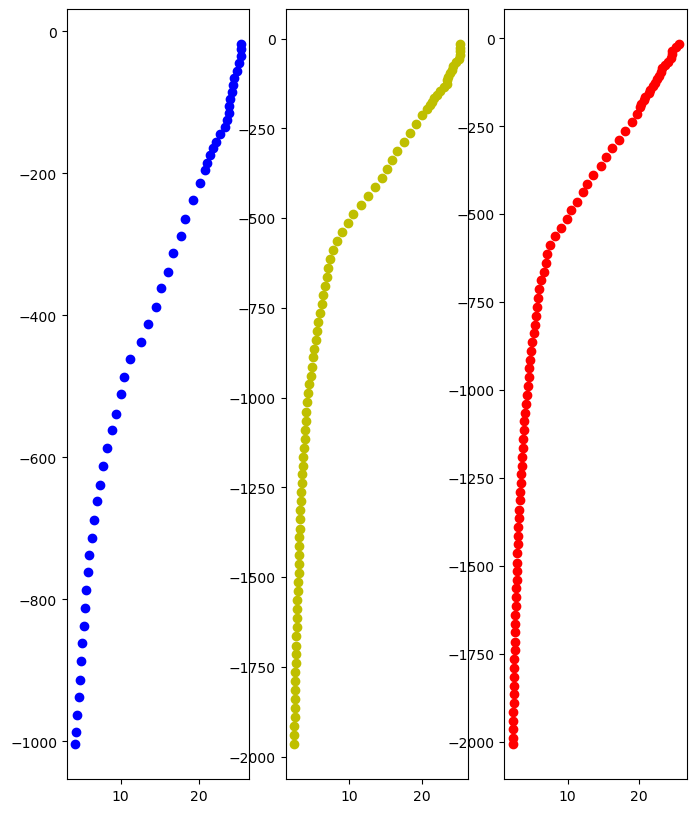

In [7]:
fig, ax = plt.subplots(1,3,figsize=(8,10))
print(f"{str(cy0D.JULD)}")
print(f"{str(cy0.JULD)}")
print(f"{str(cy1.JULD)}")
print(f"{str(cy2.JULD)}")
#Temperature
ax[0].plot(cy0D.TEMP[0],-cy0D.PRES[0],'bo',label='N_PROF=0')


ax[1].plot(cy0.TEMP[0],-cy0.PRES[0],'yo',label='N_PROF=0')
ax[2].plot(cy1.TEMP[0],-cy1.PRES[0],'ro',label='N_PROF=0')

## Remote data access via openDAP

With OPeNDAP, you can access data using an URL rather than a local path. For xarray it is like having the file locally, the only difference is that you provide a differente path.

OPeNDAP stand for *Open-source Project for a Network Data Access Protocol* [More information here](https://earthdata.nasa.gov/collaborate/open-data-services-and-software/api/opendap)

https://www.psl.noaa.gov/data/gridded_help/using_dods.html

In [9]:
base_url = '/Volumes/OkapiBU/BackUP/Dropbox/Oceanografia/Data/Satelite/noaa.oisst.v2.highres/Data/sst.day.mean'
files = [f'{base_url}.{year}.nc' for year in range(1982, 2019)]


In [10]:
ds = xr.open_mfdataset(files)
ds

<ipython-input-10-8d6387afc781>:1: FutureWarning: In xarray version 0.15 the default behaviour of `open_mfdataset`
will change. To retain the existing behavior, pass
combine='nested'. To use future default behavior, pass
combine='by_coords'. See
http://xarray.pydata.org/en/stable/combining.html#combining-multi

  ds = xr.open_mfdataset(files)
/Users/pvb/miniconda3/envs/AOS/lib/python3.8/site-packages/xarray/backends/api.py:934: FutureWarning: The datasets supplied have global dimension coordinates. You may want
to use the new `combine_by_coords` function (or the
`combine='by_coords'` option to `open_mfdataset`) to order the datasets
before concatenation. Alternatively, to continue concatenating based
on the order the datasets are supplied in future, please use the new
`combine_nested` function (or the `combine='nested'` option to
open_mfdataset).
  combined = auto_combine(


,Array,Chunk
Bytes,56.05 GB,1.52 GB
Shape,"(13514, 720, 1440)","(366, 720, 1440)"
Count,111 Tasks,37 Chunks
Type,float32,numpy.ndarray


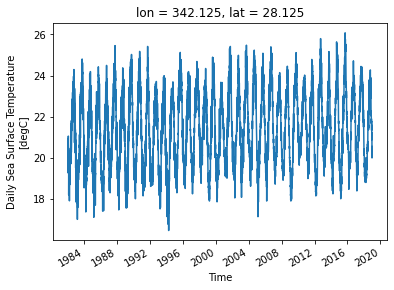

In [12]:
sst = ds.sst
sst.sel(lon=(360-18), lat=28, method='nearest').plot()